# Mini-Challenge Free Software Meetup 2018



## 1 - Intall Python and required packages

Suggested alternative:
install Conda, create an environment with python and then run the example notebook using jupyter lab.

Quick install and some tips at Linux:

1) download miniconda installer:
>wget https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh

2) install
>bash Miniconda3-latest-Linux-x86_64.sh

3) Install supports for jupyter lab  (more details at "https://github.com/jupyterlab/jupyterlab")
>conda install -c conda-forge jupyterlab

4) create an environment  (default Python 3.6.5)
>conda create --name py36

5) open the environment and required packages
> source activate py36

> conda install -c numpy scipy matplotlib pandas scikit-learn ipython nbconvert  tensorflow keras nb_conda opencv


> conda install nb_conda
6) Finally, open jupyter lab and run the notebook(.ipynb)

For more informations using install using another OS "https://conda.io/docs/user-guide/install/index.html"



**********************************

##  2 - RUNNING

In [1]:
import os
import glob
import cv2
import datetime
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings("ignore")
import scipy

np.random.seed(12345)
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation,Lambda
from keras.layers.convolutional import Convolution2D,Conv2D, MaxPooling2D, ZeroPadding2D,AveragePooling2D
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from sklearn.metrics import accuracy_score, log_loss
from keras import __version__ as keras_version

import matplotlib.pyplot as plt
%matplotlib inline



Using TensorFlow backend.


In [2]:
def getImaArrays(folder):
    X = []
    y = []
    y_name=[]
    y_filename =[]
    for subfolder in os.listdir(folder):
        index = os.listdir(folder).index(subfolder)
        for image_filename in os.listdir(folder + subfolder):
                img_file = cv2.imread(folder + subfolder + '/' + image_filename , 0)
                if img_file is not None:
                    flbase = os.path.basename(folder + subfolder + '/' + image_filename)
                    X.append(img_file)
                    y.append(index)
                    y_name.append(subfolder)
                    y_filename.append(flbase)
                    
    y = np.array(y, dtype=np.uint8)
    X = np.array(X, dtype=np.uint8)
    X = X.astype('float32')
    y_filename= np.array(y_filename,dtype=object) 
    y_name= np.array(y_name,dtype=object)
    return X,y,y_filename, y_name

### Reading images and putting into arrays

In [3]:
X_train, y_train, y_train_file, y_train_name = getImaArrays( '../datasets/images/' + 'train/')
X_train= X_train / 255

X_test, y_test, y_test_file, y_test_name = getImaArrays( '../datasets/images/' + 'test/')
X_test= X_test / 255


### Randomization of datasets

In [4]:
np.random.seed(12345)
permutation = np.random.permutation(X_train.shape[0])
X_train = X_train[permutation, :]    
y_train = y_train[permutation]
y_train_file = y_train_file[permutation]
y_train_name = y_train_name[permutation]


np.random.seed(12345)
permutation = np.random.permutation(X_test.shape[0])
X_test = X_test[permutation, :]    
y_test = y_test[permutation]
y_test_file = y_test_file[permutation]
y_test_name = y_test_name[permutation]

In [5]:
np.unique(y_test_name.astype(str))

array(['apple', 'banana', 'blackberry', 'blueberry', 'grapes', 'peanut',
       'pear', 'strawberry'], dtype='<U10')

In [6]:
# Transform categories to dummy
y_train = np_utils.to_categorical(y_train, 8)
y_test = np_utils.to_categorical(y_test, 8)

******************

# Option 1 - Simple Linear Model

In [7]:
#Settings
epochs= 15
batch_size=128

Notes: 
- usue of "[softmax](https://en.wikipedia.org/wiki/Softmax_function)" activation function 
- The batch size defines the number of samples that will be propagated through the network.

In [8]:
# X_train = X_train.reshape(X_train.shape[0], 784)
# X_train.shape
# X_test = X_test.reshape(X_test.shape[0], 784)
# X_test.shape

In [9]:
model= Sequential()
model.add(Lambda(lambda x: x, input_shape=(28, 28)))
model.add(Flatten())
model.add(Dense(8, activation='softmax' ))


In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 6280      
Total params: 6,280
Trainable params: 6,280
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
model.compile(optimizer='Adadelta',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [12]:
# fits the model on batches
history = model.fit(
            X_train,
            y_train,
            validation_split=0.2,
            epochs=epochs,
            shuffle=False,
            batch_size=batch_size, 
            verbose=0)

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [14]:
def plot_learning_curve(history):
    fig = plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
    plt.subplot(2,1,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='center right')

    plt.subplot(2,1,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='center right')
    plt.tight_layout()

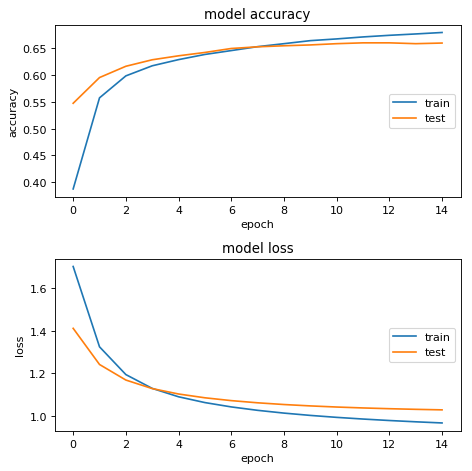

In [15]:
plot_learning_curve(history)

In [16]:
predictions_valid = model.predict(X_test.astype('float32'), batch_size=batch_size, verbose=2)
score_acc = accuracy_score(y_test, predictions_valid.round())
score_acc
#score_logloss = log_loss(y_test, predictions_valid.round())
#score_logloss

0.54625

****************************

# Option 2 - Multi Layer Perceptron (MLP)

In [17]:
#Settings
epochs= 15
batch_size=128

In [18]:
model= Sequential()
model.add(Lambda(lambda x: x, input_shape=(28, 28)))
model.add(Flatten())
model.add(Dense(128, activation='tanh' ))
model.add(Dense(8, activation='softmax' ))

In [19]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 28, 28)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 1032      
Total params: 101,512
Trainable params: 101,512
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
model.compile(optimizer='Adadelta',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
# fits the model on batches
history = model.fit(
            X_train,
            y_train,
            validation_split=0.2,
            epochs=epochs,
            shuffle=False,
            batch_size=batch_size, 
            verbose=0)

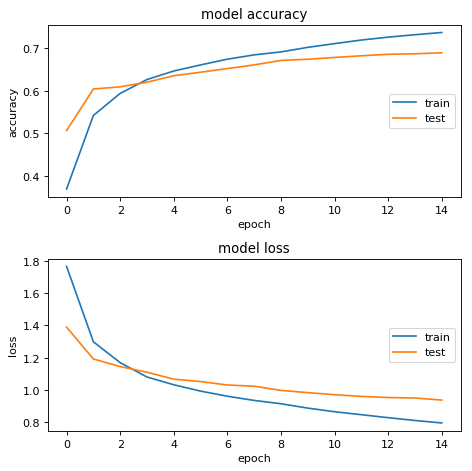

In [22]:
plot_learning_curve(history)

In [23]:
predictions_valid = model.predict(X_test.astype('float32'), batch_size=batch_size, verbose=2)
score_acc = accuracy_score(y_test, predictions_valid.round())
score_acc

0.61875

###  Introducing some changes to improve 
- "tanh" -> "[relu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)".
- Introducing "[dropout](https://en.wikipedia.org/wiki/Dropout_(neural_networks)" to control the "[overffiting](https://en.wikipedia.org/wiki/Overfitting)".
- Adding a one more "hidden layer"
- increasing the amount of generations (epochs")

In [24]:
#Settings
epochs = 50
batch_size = 128

In [25]:
model= Sequential()
model.add(Lambda(lambda x: x, input_shape=(28, 28)))
model.add(Flatten())
model.add(Dense(516, activation='relu' ))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu' ))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax' ))


In [26]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_3 (Lambda)            (None, 28, 28)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 516)               405060    
_________________________________________________________________
dropout_1 (Dropout)          (None, 516)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               66176     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 1032      
Total para

In [27]:
model.compile(optimizer='Adadelta',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [28]:
# fits the model on batches
history = model.fit(
            X_train,
            y_train,
            validation_split=0.2,
            epochs=epochs,
            shuffle=False,
            batch_size=batch_size, 
            verbose=0)

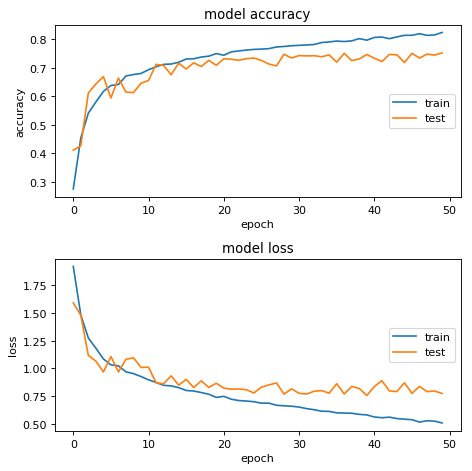

In [29]:
plot_learning_curve(history)

In [30]:
predictions_valid = model.predict(X_test.astype('float32'), batch_size=batch_size, verbose=2)
score_acc = accuracy_score(y_test, predictions_valid.round())
score_acc

0.725

*******************

# Option 3 - Convolutional Neural Networks (CNN)

## LENET -5 Architecture

![title](../images/leNet-5.png)


Yann LeCun, Leon Bottou, Yosuha Bengio and Patrick Haffner proposed a neural network architecture for handwritten and machine-printed character recognition in 1990’s which they called LeNet-5. 
he LeNet-5 architecture consists of two sets of convolutional and average pooling layers, followed by a flattening convolutional layer, then two fully-connected layers and finally a softmax classifier.
The input plane receives images of characters that are approximately size normalized and centere.  Each unit in a layer receives inputs from a set of units located in a small neighborhood (local receptive fields LRF). With local receptive fields neurons can extract elementary visual features such as oriented edges, endpoints, corners. These features
are then combined by the subsequent layers in order to detect higher order features.

In [31]:
# Settings
epochs = 15
batch_size = 128

In [32]:
#Reshape the training and test set
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [33]:
model= Sequential()
# First layer:
model.add(Convolution2D(6, kernel_size=(5,5), padding="same", input_shape=(28, 28,1)))
model.add(Activation('tanh'))
# Second hidden layer
model.add(AveragePooling2D(pool_size=(2, 2)))
# Third hidden layer  
model.add(Convolution2D(filters = 16,  kernel_size=(5,5), padding="same"))
model.add(Activation('tanh'))
# Fourth hidden layer
model.add(AveragePooling2D(pool_size=(2,2)))
# Flatten output into feature vector and feed into dense layer        
model.add(Flatten())
# Here start the MLP with two hidden layers
model.add(Dense(120))
model.add(Activation('tanh'))
model.add(Dense(84 ))
model.add(Activation('tanh'))
model.add(Dense(8 ))
model.add(Activation('softmax'))

In [34]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
average_pooling2d_2 (Average (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
__________

In [35]:
model.compile(optimizer='Adadelta',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [36]:
# fits the model on batches
history = model.fit(
            X_train,
            y_train,
            validation_split=0.2,
            epochs=epochs,
            shuffle=False,
            batch_size=batch_size, 
            verbose=0)

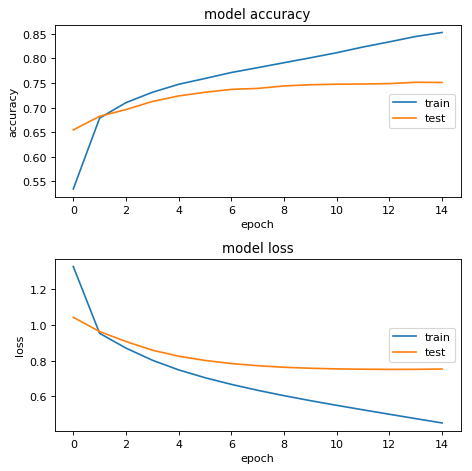

In [37]:
plot_learning_curve(history)

In [38]:
predictions_valid = model.predict(X_test.astype('float32'), batch_size=batch_size, verbose=2)
score_acc = accuracy_score(y_test, predictions_valid.round())
score_acc

0.715625

*******************

###  Introducing some changes to improve 

- "tanh" -> "[relu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)".
- increase te amount of generations.
- introducing "[dropout](https://en.wikipedia.org/wiki/Dropout_(neural_networks)"  rate.

In [39]:
epochs = 50

In [40]:
model= Sequential()
# First layer:
model.add(Convolution2D(6, kernel_size=(5,5), padding="same", input_shape=(28, 28,1)))
model.add(Activation('relu'))
# Second hidden layer
model.add(AveragePooling2D(pool_size=(2, 2)))
# Third hidden layer  
model.add(Convolution2D(filters = 16,  kernel_size=(5,5), padding="same"))
model.add(Activation('relu'))
# Fourth hidden layer
model.add(AveragePooling2D(pool_size=(2,2)))
# Flatten output into feature vector and feed into dense layer        
model.add(Flatten())
# Here start the MLP with two hidden layers
model.add(Dense(518))
model.add(Activation('relu'))
model.add(Dropout(0.65))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(8 ))
model.add(Activation('softmax'))

In [41]:
model.compile(optimizer='Adadelta',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [42]:
# fits the model on batches
history = model.fit(
            X_train,
            y_train,
            validation_split=0.2,
            epochs=epochs,
            shuffle=False,
            batch_size=batch_size, 
            verbose=0)

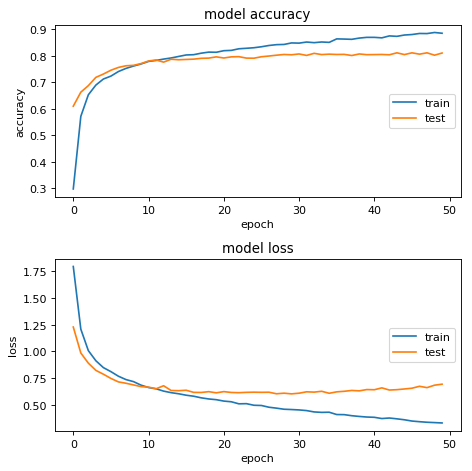

In [43]:
plot_learning_curve(history)

In [44]:
predictions_valid = model.predict(X_test.astype('float32'), batch_size=batch_size, verbose=2)
score_acc = accuracy_score(y_test, predictions_valid.round())
score_acc

0.78625

*************************

# Results Analysis of the CNN model

In [45]:
import matplotlib.pyplot as plt
from numpy import argmax


df_results=pd.DataFrame()
df_results['file']=y_test_file
df_results['obs']=y_test_name
df_results['observed']=argmax(y_test, axis=1)
df_results['predicted']=argmax(model.predict(X_test.astype('float32'), batch_size=batch_size, verbose=2), axis=1)

In [46]:
# obs= argmax(y_test, axis=1)
# pred = argmax(model.predict(X_test.astype('float32'), batch_size=batch_size, verbose=2), axis=1)
# plt.imshow(X_test_check[obs ==pred][1])
# y_test_file[obs ==pred][1]
# y_test_name[obs ==pred][1]

In [47]:
indices = df_results.drop_duplicates(subset='obs', keep="first")[['obs', 'observed']].reset_index()
del indices['index']
indices.columns= ["pred", "id"]
indices

pred  id
0  blackberry   6
1      peanut   5
2      grapes   1
3        pear   3
4      banana   4
5       apple   0
6  strawberry   2
7   blueberry   7

In [48]:
df_results2 = df_results.merge(indices, left_on="predicted", right_on="id")[['file', 'obs', 'pred', 'observed','predicted']]
#random sample of results
np.random.seed(12345)
rows = np.random.choice(df_results2.index.values, 10)
sampled_df = df_results2.ix[rows]
sampled_df

file         obs        pred  \
482   97cf0f3d-a38e-4fe4-8f4c-fcfeb9cbdb52.jpeg   blueberry      grapes   
1509  bd775ac5-ed3f-4d58-b432-968e76a93e19.jpeg      peanut   blueberry   
1309  723c722b-44a7-46cf-9e94-b77811a92c16.jpeg  strawberry  strawberry   
129   1b395f89-9a11-4cdd-bd8d-305eece4fe53.jpeg  blackberry  blackberry   
1444  72801557-d4d4-4ee1-b854-841c20e04191.jpeg   blueberry   blueberry   
1449  f0285356-3f30-44d7-9603-dcdc7cd4d488.jpeg   blueberry   blueberry   
382   10b75bc4-ef53-4588-90bc-370c06fd79b2.jpeg  blackberry      grapes   
1381  54fa8069-ca7f-4b13-b18a-25c9a0b04dbd.jpeg  strawberry  strawberry   
546   04c8d809-fb1c-4cb3-9d0b-47f9a245cf47.jpeg      grapes      grapes   
1565  81f40702-176e-4780-ae76-319703bd7146.jpeg       apple   blueberry   

      observed  predicted  
482          7          1  
1509         5          7  
1309         2          2  
129          6          6  
1444         7          7  
1449         7          7  
382          6          1  
1381         2          2  
546          1          1  
1565         0          7

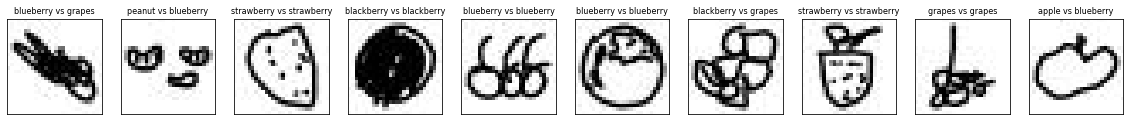

observed vs prediction


In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

X_test_check = X_test.reshape(X_test.shape[0], 28, 28)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_check[np.where(y_test_file == sampled_df['file'].values[i])[0]][0])
    obs= sampled_df['obs'].values[i]
    pred= sampled_df['pred'].values[i]
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    plt.title(str(obs) + " vs " + str(pred), fontsize = 8 )
    plt.ylabel('loss')
    plt.xlabel('epoch')
plt.show()
print("observed vs prediction")

In [50]:
predictions = argmax(model.predict(X_test.astype('float32'), batch_size=batch_size, verbose=2), axis=1)
print(classification_report(y_test.argmax(axis=1),
        predictions,
        target_names=[str(x) for x in indices.id]))

              precision    recall  f1-score   support

           6       0.84      0.79      0.81       200
           5       0.64      0.84      0.73       200
           1       0.89      0.88      0.88       200
           3       0.87      0.84      0.86       200
           4       0.93      0.90      0.91       200
           0       0.87      0.85      0.86       200
           2       0.73      0.61      0.66       200
           7       0.69      0.69      0.69       200

   micro avg       0.80      0.80      0.80      1600
   macro avg       0.81      0.80      0.80      1600
weighted avg       0.81      0.80      0.80      1600



## Checking the predictions

In [51]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [52]:
tmp=df_results2[df_results2.pred==df_results2.obs][['file','obs']].groupby(['obs']).agg(['count'])
tmp

file
           count
obs             
apple        158
banana       179
blackberry   122
blueberry    138
grapes       169
peanut       170
pear         169
strawberry   175

In [53]:
confusion_matrix(df_results2.obs, df_results2.pred)

array([[158,   0,   0,  22,   1,   0,  13,   6],
       [  0, 179,   2,   6,  10,   2,   1,   0],
       [  1,   2, 122,  11,  53,   7,   0,   4],
       [ 15,   3,  12, 138,  18,   6,   4,   4],
       [  0,   4,  18,   4, 169,   1,   2,   2],
       [  0,   3,   4,  10,   5, 170,   5,   3],
       [  7,   0,   2,   4,   5,  10, 169,   3],
       [  7,   2,   8,   4,   4,   0,   0, 175]])

Normalized confusion matrix
[[0.79  0.    0.    0.11  0.005 0.    0.065 0.03 ]
 [0.    0.895 0.01  0.03  0.05  0.01  0.005 0.   ]
 [0.005 0.01  0.61  0.055 0.265 0.035 0.    0.02 ]
 [0.075 0.015 0.06  0.69  0.09  0.03  0.02  0.02 ]
 [0.    0.02  0.09  0.02  0.845 0.005 0.01  0.01 ]
 [0.    0.015 0.02  0.05  0.025 0.85  0.025 0.015]
 [0.035 0.    0.01  0.02  0.025 0.05  0.845 0.015]
 [0.035 0.01  0.04  0.02  0.02  0.    0.    0.875]]


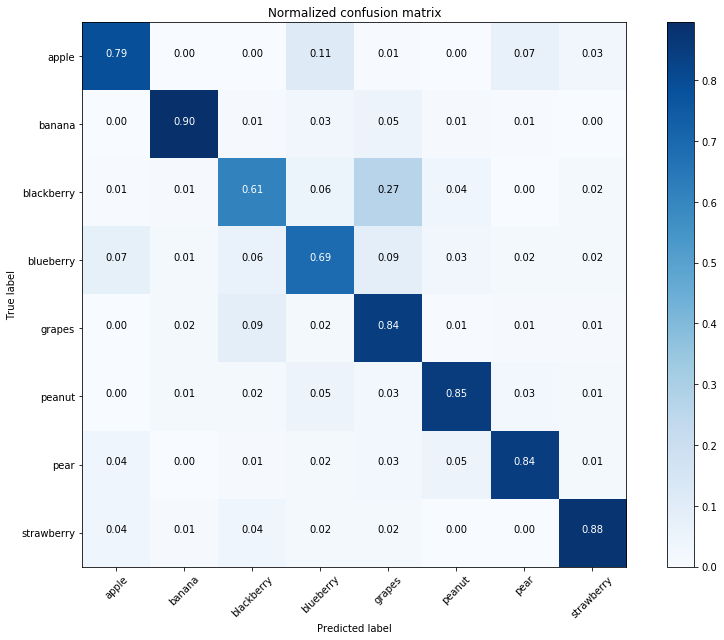

In [54]:
plot_confusion_matrix(confusion_matrix(df_results2.obs, df_results2.pred) , classes=tmp.index.get_values(), normalize=True,
                      title='Normalized confusion matrix')

**************************************

# Generate predictions for the submission dataset using the CNN model 

In [55]:
def getSubmitArrays(folder):
    X = []
    y_filename =[]
    
    for image_filename in os.listdir(folder):
            img_file = cv2.imread(folder + '/' + image_filename , 0)
            if img_file is not None:
                flbase =  image_filename
                X.append(img_file)
                y_filename.append(flbase)
                    
    X = np.array(X, dtype=np.uint8)
    X = X.astype('float32')
    y_filename= np.array(y_filename,dtype=object) 
    return X,y_filename

In [56]:
X_submit, y_submit_file = getSubmitArrays( '../datasets/images/' + 'submit/')
X_submit= X_submit / 255
#Reshape the submission set
X_submit = X_submit.reshape(X_submit.shape[0], 28, 28,1)

In [ ]:
df_submit=pd.DataFrame()
df_submit['image']=y_submit_file
df_submit['predicted']= argmax(model.predict(X_submit.astype('float32'), batch_size=batch_size, verbose=2), axis=1)
df_submit=df_submit.reset_index()
df_submit = df_submit.merge(indices, left_on="predicted", right_on="id", sort=False)
df_submit.sort_values(by=['index'], inplace=True)
df_submit=df_submit[['image','pred']]
df_submit.columns=['image','prediction']

In [ ]:
df_submit.head()

In [ ]:
df_submit.to_csv('Cuck_Norris_py.csv', index=None)